In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./src/score_kakao_1101.csv')
df

,날짜,댓글,BERT,LSTM
0,2022-05-29,종전선언도 반대한다는 양키 괴뢰!!,0.306589,0.000861
1,2022-05-29,매매하는데 심리가 95%,0.445295,0.000742
2,2022-05-29,"월요일,화요일 엄청 오르겠네요.",0.837858,1.000000
3,2022-05-29,얼마나 재투자 해야하는지 알려준다,0.315247,0.001242
4,2022-05-29,★★★주식담보대출/신용 금리이벤트★★★,0.586085,0.967046
...,...,...,...,...
49450,2021-11-01,잡주에 물린게 한이다,0.135482,0.000000
49451,2021-11-01,외국인기관=쌍끌이양매수~바닥찍고V급등,0.033352,1.000000
49452,2021-11-01,카카오는 주가부양 대책없냐?,0.099854,0.007037
49453,2021-11-01,디카르고가 진카입니다,0.877022,0.005245


<AxesSubplot:xlabel='날짜'>

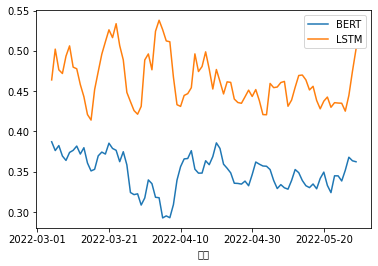

In [50]:
df.groupby('날짜').mean().rolling(5).mean().plot()

<AxesSubplot:xlabel='날짜'>

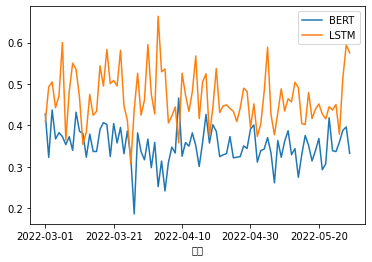

In [48]:
df.groupby('날짜').mean().plot()

In [41]:
import pandas as pd
import numpy as np
import re
import pickle
import requests
from bs4 import BeautifulSoup
from datetime import date
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

def konlpy_okt(df):
    okt = Okt()
    tag_list = ['Noun','Verb','Adjective','VerbPrefix'] 
    comment_list = df['댓글'].to_list()
    tokenized_data = []
    for i in range(len(comment_list)):
        tokenized_sentence = okt.pos(str(comment_list[i]), stem=True) 
        tag_checked_sentence = []
        for j in tokenized_sentence:
            x,y = j
            if y in tag_list:
                tag_checked_sentence.append(x)
        tokenized_data.append(tag_checked_sentence)   
        print(f'\r{i+1}개 형태소분리중',end='')
    for i in tokenized_data:
        for j in range(len(i)):
            i[j] = "'"+i[j]+"'"
    return tokenized_data
    
def tokenize(df):
    tokenized_data = konlpy_okt(df)
    test = tokenizer.texts_to_sequences(tokenized_data)
    test = pad_sequences(test, maxlen=15)
    return test

def feargreed_indexx(df): 
    test = tokenize(df)
    pred = model.predict(test)
    return pred

In [46]:
df['LSTM'] = feargreed_indexx(df)
df['LSTM'] = df['LSTM'].round(6)
df = df.reset_index(drop=True)
df

9433개 형태소분리중

,날짜,댓글,BERT,LSTM
0,2022-05-29,굿,0.943010,0.301843
1,2022-05-29,도대체왜 걸어다니면서 담배피는거냐?니들은...,0.055868,0.229988
2,2022-05-29,쇼핑업계 손절한 `빠른배송`…네이버는 어...,0.210454,0.000000
3,2022-05-29,낼 상한가...,0.227119,1.000000
4,2022-05-29,낼폭등,0.069681,1.000000
...,...,...,...,...
9428,2022-03-01,어르신들 .,0.404791,0.030063
9429,2022-03-01,차트는 좋네,0.153072,1.000000
9430,2022-03-01,[잘쳐먹고잘산다는미명하에 온갖곳에 악질이...,0.706786,1.000000
9431,2022-03-01,"●●●● 찢재명,,, 왈 ~~",0.845221,0.104308


In [42]:
# LSTM 토크나이저
with open('./src/lstm/goodtokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)  
# LSTM 모델
model = load_model('./src/lstm/goodmodel.h5')

In [43]:
df = pd.read_csv('./src/score_naver_0301.csv')
df

,날짜,댓글,BERT,LSTM
0,2022-05-29,굿,0.943010,0.002760
1,2022-05-29,도대체왜 걸어다니면서 담배피는거냐?니들은...,0.055868,0.003480
2,2022-05-29,쇼핑업계 손절한 `빠른배송`…네이버는 어...,0.210454,0.000000
3,2022-05-29,낼 상한가...,0.227119,0.999998
4,2022-05-29,낼폭등,0.069681,0.999996
...,...,...,...,...
9428,2022-03-01,어르신들 .,0.404791,0.002084
9429,2022-03-01,차트는 좋네,0.153072,0.999999
9430,2022-03-01,[잘쳐먹고잘산다는미명하에 온갖곳에 악질이...,0.706786,0.999999
9431,2022-03-01,"●●●● 찢재명,,, 왈 ~~",0.845221,0.013839


In [44]:
del df['LSTM']

In [51]:
df.to_csv('./src/score_naver_0301.csv',index=False)